<h1 style='text-align: center;'> Final Project 4 : Clustering with K-Means Clustering </h1>

## Created by: Kelompok 9
### Class: PYTN-KS18

- 👤 **Member 1:** Vincent Tanaka - PYTN-KS18-013
- 👤 **Member 2:** Audris Vondrea Wirduno - PYTN-KS18-02


## a. Introduction

### Brief

<div align="justify">

*Project* ini akan membahas mengenai penggunaan *clustering* yang merupakan teknik *unsupervised machine learning* pada *dataset* pengguna kartu kredit yang terdiri dari ***9000*** pengguna. Hasil akhir yang diharapkan adalah untuk mendapatkan strategi marketing yang efektif dari hasil *clustering* yang dilakukan.

</div>

### a.1 Background

<div align="justify">

Pada *notebook* ini studi kasus yang dibahas berupa prilaku **9000** pengguna kartu kredit aktif dalam waktu 6 Bulan. Dengan jumlah variabel sebanyak **18**. Hasil yang diharapkan dari studi kasus ini dalah untuk membuat sebuah strategi marketing dari *clustering* yang akan dilakukan setelahnya.  
Data didapatkan dari kaggle dengan link : https://www.kaggle.com/datasets/arjunbhasin2013/ccdata

</div>

### a.2 About Dataset

Berikut adalah deskripsi **18** variabel dari *dataset* yang akan digunakan:  
1. **CUSTID** - Identification of Credit Card holder (Categorical)
2. **BALANCE** - Balance amount left in their account to make purchases
3. **BALANCEFREQUENCY** - How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
4. **PURCHASES** - Amount of purchases made from account
5. **ONEOFFPURCHASES** - Maximum purchase amount done in one-go
6. **INSTALLMENTSPURCHASES** - Amount of purchase done in installment
7. **CASHADVANCE** - Cash in advance given by the user
8. **PURCHASESFREQUENCY** - How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
9. **ONEOFFPURCHASESFREQUENCY** - How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
10. **PURCHASESINSTALLMENTSFREQUENCY** - How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
11. **CASHADVANCEFREQUENCY** - How frequently the cash in advance being paid
12. **CASHADVANCETRX** - Number of Transactions made with "Cash in Advance"
13. **PURCHASESTRX** - Number of purchase transactions made
14. **CREDITLIMIT** - Limit of Credit Card for user
15. **PAYMENTS** - Amount of Payment done by user
16. **MINIMUM_PAYMENTS** - Minimum amount of payments made by user
17. **PRCFULLPAYMENT** - Percent of full payment paid by user
18. **TENURE** - Tenure of credit card service for user

### a.3 Project Objectives

Adapun *Objective* dari pengerjaan *final project* ini yaitu :  
1. Melakukan eksplorasi data mengenai hubungan antar variabel dari data.
2. Melakukan *preprocessing data* sebelum pemodelan data.
3. Melakukan pemodelan data *clustering* yang sudah ditentukan
4. Mengambil kesimpulan dari apa yang sudah dilakukan.

## b. Import Libraries

In [1]:
# import the needed libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

## c. *Dataset Loading*

In [2]:
# Import the dataset given, name it as df
df = pd.read_csv('cc-dataset.zip',compression='zip')

In [3]:
# Show top 5 row of df
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
df.shape

(8950, 18)

<div align="justify">

Disini bisa disimpulkan bahwa *dataset* yang akan digunakan memiliki data sebanyak **8950** baris dengan jumlah variabel sebanyak **18** kolom.

</div>

## d. Data Cleaning

### d.1 Duplicate Data Handling

In [7]:
# Check if there's a duplicated data
df.duplicated().sum()

0

Dari hasil pengecekan tidak ada data duplikat pada *dataset* ini, proses dilanjut dengan meng-*handle missing values*.

### d.2 Missing Data Handling

In [8]:
df.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Terdapat **2** kolom yang memiliki *missing values*, yaitu **CREDIT_LIMIT(1 missing value)** dan **MINIMUM_PAYMENTS(313 missing values)**. Maka dari itu data tersebut akan dihandle menggunakan inputasi. Pertama-tama bisa dicek terlebih dahulu distribusi data pada kedua kolom tersebut.

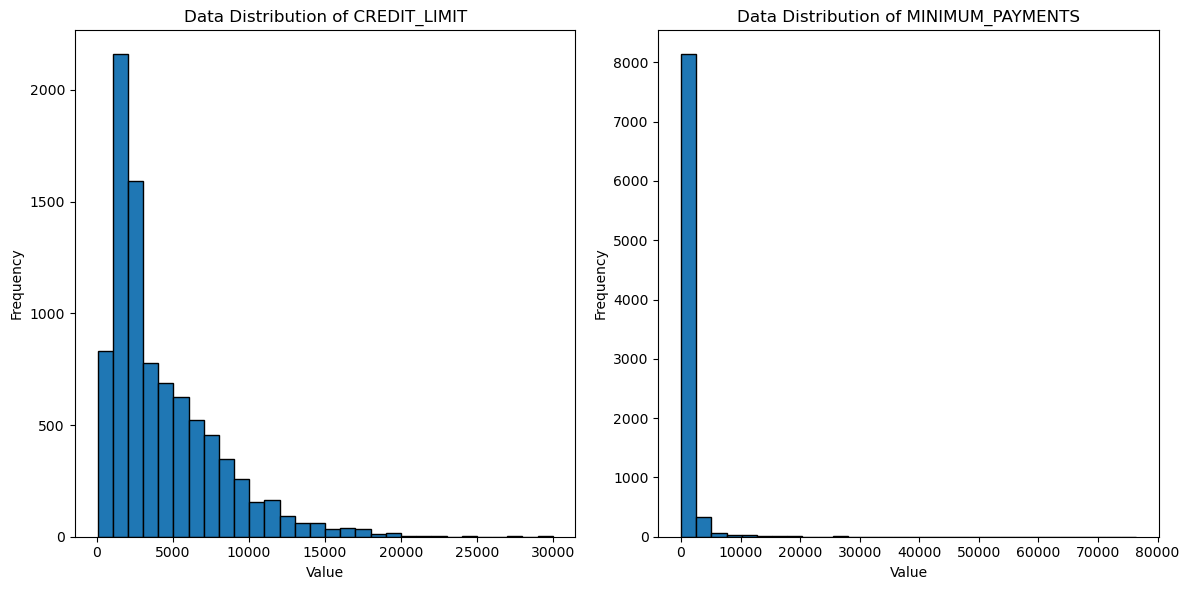

In [9]:
# List of columns with missing values to plot
columns_to_plot = ['CREDIT_LIMIT', 'MINIMUM_PAYMENTS']

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a figure and set its size
plt.figure(figsize=(12, 6))

# Loop through the missing value columns list and create a subplot for each
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(1, 2, i)  # 1 row, 2 columns, subplot index
    sns.histplot(df[column].dropna(), bins=30, kde=False, edgecolor='black')
    plt.title(f'Data Distribution of {column}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


Dari hasil ini bisa disimpulkan bahwa distribusi data kedua kolom yang memiliki *missing values* cenderung ke *right-skewed* dimana nilai *mean* < nilai *median*. Dengan kondisi tersebut data yang kosong akan diisi dengan nilai median dikarenakan distribusi data tidak normal.

In [10]:
# define a list of columns that need to be filled with median number
columns_to_fill = ['CREDIT_LIMIT', 'MINIMUM_PAYMENTS']

for columns in columns_to_fill:
    median_value = df[columns].median()
    df[columns].fillna(median_value, inplace=True)

# Verify if NaN values have been filled
df.isna().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

Disini data sudah tidak memiliki nilai kosong, proses bisa dilanjut dengan membuang kolom yang tidak diperlukan.

### d.3 Dropping un-needed Columns

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [14]:
df.head(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


Dari hasil tampilan *dataframe*, bisa disimpulkan bahwa kolom **CUST_ID** merupakan sebuah *primary key* dari *dataset*. Dikarenakan nilai didalamnya merupakan *unique value* yang berjumlah sebanyak **8950** *unique values*, maka kelompok 9 akan menetapkan bahwa kolom ini akan dibuang.

In [15]:
df.drop(columns='CUST_ID', inplace=True)
df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,312.343947,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


Sekarang, data uang akan digunakan hanya terdiri dari **17** kolom saja. Proses bisa dilanjutkan dengan melakukan *EDA*.

## e. Explanatory Data Analysis